In [1]:
import xarray as xr
import fsspec

xr.set_options(display_style="html")  

In [2]:
file_location = 's3://pangeo-forge-aws-bakery-flowcachebucketdasktest4-10neo67y7a924/pangeo-forge/staged-recipes/gpm-imerge-hhr.zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds = xr.open_zarr(ikey, consolidated=True)

ds

<xarray.Dataset>
Dimensions:                         (time: 2, lon: 3600, lat: 1800)
Coordinates:
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * time                            (time) object 2000-06-01 00:00:00 2000-06...
Data variables:
    HQobservationTime               (time, lon, lat) timedelta64[ns] ...
    HQprecipSource                  (time, lon, lat) float32 ...
    HQprecipitation                 (time, lon, lat) float32 ...
    IRkalmanFilterWeight            (time, lon, lat) float32 ...
    IRprecipitation                 (time, lon, lat) float32 ...
    precipitationCal                (time, lon, lat) float32 ...
    precipitationQualityIndex       (time, lon, lat) float32 ...
    precipitationUncal              (time, lon, lat) float32 ...
    probabilityLiquidPrecipitation  (time, lon, lat) float32 ...
    randomError                     (time, lon, lat) float32 ...
Attributes:
    GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeRe...

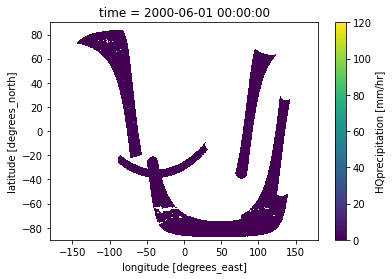

In [6]:
ds.transpose('time', 'lat', 'lon').HQprecipitation[0].plot()